## Importing Libraries

In [53]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

### Setup Working Directory [Discarded]

In [54]:
# #read the path
# file_path = ""

### Filtering Parquet Files from WD

In [55]:
#select parquet files only
par_files = glob.glob('nyc_green_taxi_parquet_format/*.{}'.format('parquet'))

In [56]:
# trips = pd.read_parquet('nyc_green_taxi_parquet_format/green_tripdata_2018-01.parquet', engine='pyarrow')
trips = pd.concat([pd.read_parquet(f,engine='pyarrow') for f in par_files ], ignore_index=True)
locations = pd.read_csv('taxi_zone.csv')

## Export CSV [DISABLED]

In [57]:
#trips.to_csv('greeen_trip_2018_consolidated.csv')

## Data Verification using basic Analysis

In [58]:
trips.head(-1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2018-10-01 00:05:48,2018-10-01 00:21:49,N,1.0,255,97,2.0,4.37,16.0,0.5,0.5,0.00,0.0,NaN,0.3,17.30,2.0,1.0,None
1,2,2018-10-01 00:24:19,2018-10-01 00:31:50,N,1.0,97,49,2.0,1.45,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,None
2,2,2018-10-01 00:12:06,2018-10-01 00:21:15,N,1.0,25,181,1.0,2.04,9.0,0.5,0.5,1.50,0.0,NaN,0.3,11.80,1.0,1.0,None
3,2,2018-10-01 00:34:42,2018-10-01 00:39:23,N,1.0,25,40,1.0,0.91,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2.0,1.0,None
4,2,2018-10-01 00:50:21,2018-10-01 01:01:28,N,1.0,25,257,1.0,3.53,12.5,0.5,0.5,0.00,0.0,NaN,0.3,13.80,2.0,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899712,1,2018-05-31 23:34:16,2018-05-31 23:38:40,N,1.0,74,41,1.0,1.20,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,None
8899713,1,2018-05-31 23:41:41,2018-05-31 23:45:57,N,1.0,41,42,1.0,1.40,6.0,0.5,0.5,1.45,0.0,None,0.3,8.75,1.0,1.0,None
8899714,2,2018-05-31 23:55:23,2018-06-01 00:01:11,N,1.0,25,181,1.0,1.28,6.5,0.5,0.5,1.56,0.0,None,0.3,9.36,1.0,1.0,None
8899715,2,2018-05-31 23:53:48,2018-05-31 23:59:53,N,1.0,74,24,1.0,1.67,7.5,0.5,0.5,1.76,0.0,None,0.3,10.56,1.0,1.0,None


In [59]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,8.899718e+06,8.798641e+06,8.899718e+06,8.899718e+06,8.798641e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.798641e+06,8.797743e+06
mean,1.840284e+00,1.114561e+00,1.108305e+02,1.287681e+02,1.350911e+00,3.252301e+00,1.374802e+01,3.560283e-01,4.890977e-01,1.004409e+00,1.840954e-01,2.867707e-01,1.609376e+01,1.440722e+00,1.027873e+00
std,3.663905e-01,7.112441e-01,7.408927e+01,7.675273e+01,1.030820e+00,4.582039e+00,1.303500e+01,4.861849e-01,8.616116e-02,1.994808e+00,1.212403e+00,6.513242e-02,1.407958e+01,5.189033e-01,1.646097e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+02,-2.542000e+01,-5.000000e-01,-1.000000e+02,-1.500000e+01,-3.000000e-01,-5.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.200000e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.930000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.180000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.900000e+00,1.650000e+01,5.000000e-01,5.000000e-01,1.660000e+00,0.000000e+00,3.000000e-01,1.910000e+01,2.000000e+00,1.000000e+00
max,5.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,8.005680e+03,1.044584e+04,1.100000e+01,8.291000e+01,4.855500e+02,7.655400e+02,3.000000e-01,1.052875e+04,5.000000e+00,2.000000e+00


In [60]:
trips.memory_usage()

Index                         128
VendorID                 71197744
lpep_pickup_datetime     71197744
lpep_dropoff_datetime    71197744
store_and_fwd_flag       71197744
RatecodeID               71197744
PULocationID             71197744
DOLocationID             71197744
passenger_count          71197744
trip_distance            71197744
fare_amount              71197744
extra                    71197744
mta_tax                  71197744
tip_amount               71197744
tolls_amount             71197744
ehail_fee                71197744
improvement_surcharge    71197744
total_amount             71197744
payment_type             71197744
trip_type                71197744
congestion_surcharge     71197744
dtype: int64

In [61]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,8.899718e+06,8.798641e+06,8.899718e+06,8.899718e+06,8.798641e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.798641e+06,8.797743e+06
mean,1.840284e+00,1.114561e+00,1.108305e+02,1.287681e+02,1.350911e+00,3.252301e+00,1.374802e+01,3.560283e-01,4.890977e-01,1.004409e+00,1.840954e-01,2.867707e-01,1.609376e+01,1.440722e+00,1.027873e+00
std,3.663905e-01,7.112441e-01,7.408927e+01,7.675273e+01,1.030820e+00,4.582039e+00,1.303500e+01,4.861849e-01,8.616116e-02,1.994808e+00,1.212403e+00,6.513242e-02,1.407958e+01,5.189033e-01,1.646097e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+02,-2.542000e+01,-5.000000e-01,-1.000000e+02,-1.500000e+01,-3.000000e-01,-5.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.200000e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.930000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.180000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.900000e+00,1.650000e+01,5.000000e-01,5.000000e-01,1.660000e+00,0.000000e+00,3.000000e-01,1.910000e+01,2.000000e+00,1.000000e+00
max,5.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,8.005680e+03,1.044584e+04,1.100000e+01,8.291000e+01,4.855500e+02,7.655400e+02,3.000000e-01,1.052875e+04,5.000000e+00,2.000000e+00


In [62]:
trips['VendorID'].value_counts()

2    7478185
1    1421507
5         26
Name: VendorID, dtype: int64

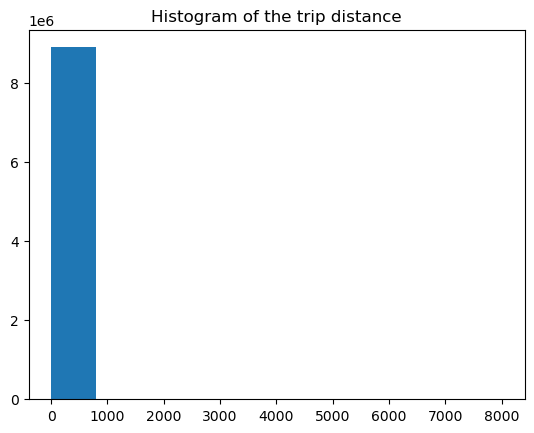

In [63]:
plt.hist(trips["trip_distance"])
plt.title('Histogram of the trip distance')
plt.show()

/Users/pareekkarishamagmail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

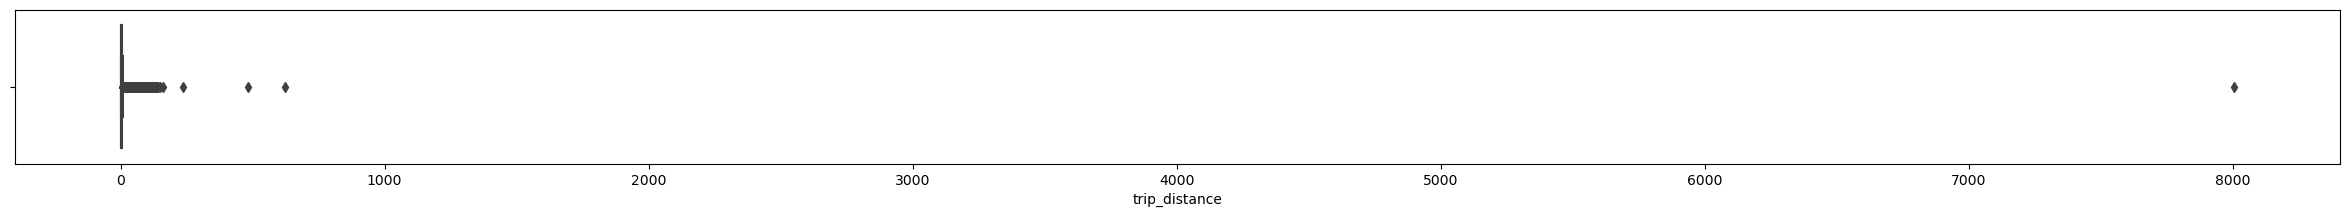

In [65]:
plt.figure(figsize=[30,2])
sns.boxplot(trips['trip_distance'])

In [67]:
print(f"There are {trips[trips['trip_distance']==0].shape[0]} records with Trip distance being zero.")

There are 103595 records with Trip distance being zero.


In [68]:
#Removing records in which trip distance is 0.
trip_Distance = trips.trip_distance[trips.trip_distance>0]
#Removing records in which trip distance is 3 standard deviations away from mean.
trip_Distance = trip_Distance[(trip_Distance-trip_Distance.median()).abs() < 4*trip_Distance.std()]